In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
np.random.seed(5)

# Linear regression

$$ y = slope * X + intercept $$

**Terms**:
$$ slope = \alpha = \beta = weight_1 = w_1$$ 
$$ intercept = bias = weight_2 = w_2$$
$$ y = dependent variable = target $$
$$ X = independent variable = features $$

## Intercept

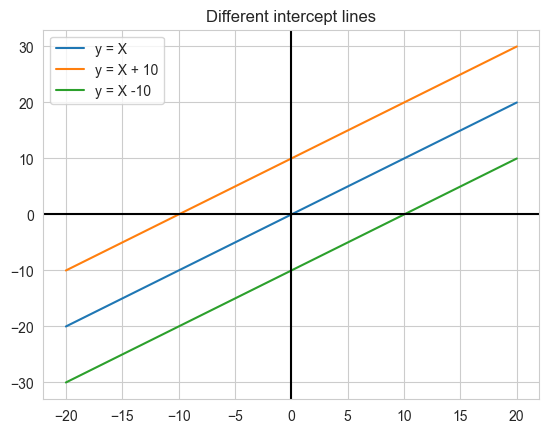

In [2]:
X = np.linspace(-20, 20, 100)
y = X
intercept = 10
intercept_2 = -10

y_1 = X + intercept
y_2 = X + intercept_2
# plt.scatter(X, y)
plt.plot(X, y, label=f'y = X')
plt.plot(X, y_1, label=f'y = X + {intercept}')
plt.plot(X, y_2, label=f'y = X {intercept_2}')
plt.title('Different intercept lines')
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.legend()
plt.show()

## Slope

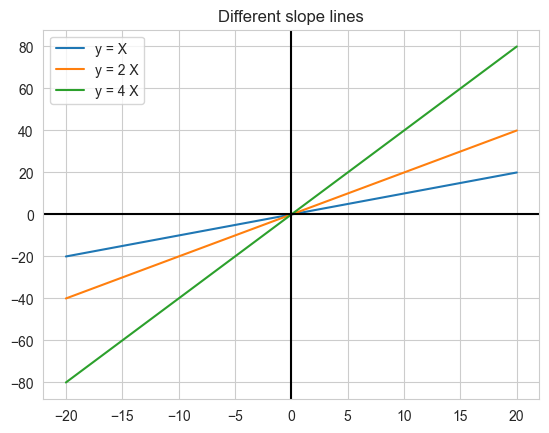

In [3]:
X = np.linspace(-20, 20, 100)
y = X
slope = 2
slope_2 = 4

y_1 = slope * X
y_2 = slope_2 * X
# plt.scatter(X, y)
plt.plot(X, y, label=f'y = X')
plt.plot(X, y_1, label=f'y = {slope} X')
plt.plot(X, y_2, label=f'y = {slope_2} X')
plt.title('Different slope lines')
plt.axvline(0, color='black')
plt.axhline(0, color='black')
plt.legend()
plt.show()

# Linear regression with one parameter

In [4]:
from sklearn import datasets

In [5]:
X, y = datasets.make_regression(n_samples=15, n_features=1, noise=5)

In [6]:
X.shape

(15, 1)

In [7]:
y.shape

(15,)

In [8]:
df = pd.DataFrame({'X' : X.ravel(), 'y' : y})

In [9]:
df

,X,y
0,0.109610,1.942040
1,-0.358829,-21.323803
2,-1.664789,-103.347389
3,-0.330870,-11.682514
4,-0.204877,-1.688673
5,-0.252092,-20.402539
6,0.187603,10.674766
7,2.430771,160.132079
8,1.582481,95.416759
9,0.603472,39.577545


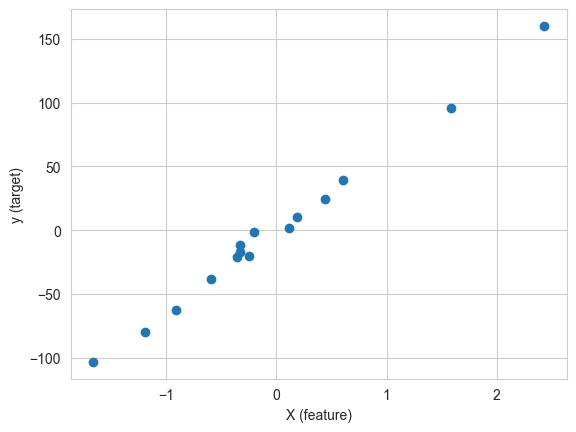

In [10]:
plt.scatter(X, y)
plt.xlabel('X (feature)')
plt.ylabel('y (target)')
plt.show()

In [11]:
X_value = np.linspace(X.min(), X.max())

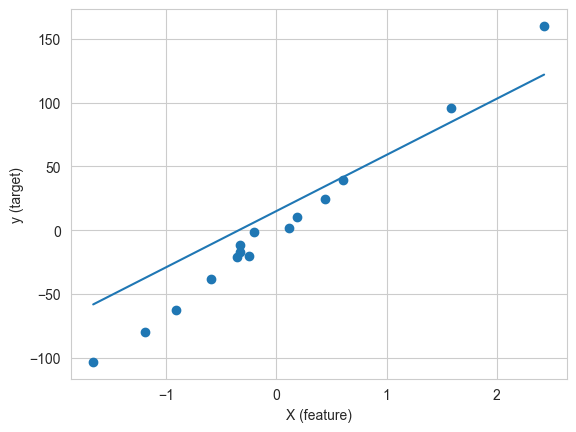

In [12]:
slope = 44
intercept = 15
y_value = slope * X_value + intercept

plt.scatter(X, y)
plt.plot(X_value, y_value)
plt.xlabel('X (feature)')
plt.ylabel('y (target)')
plt.show()

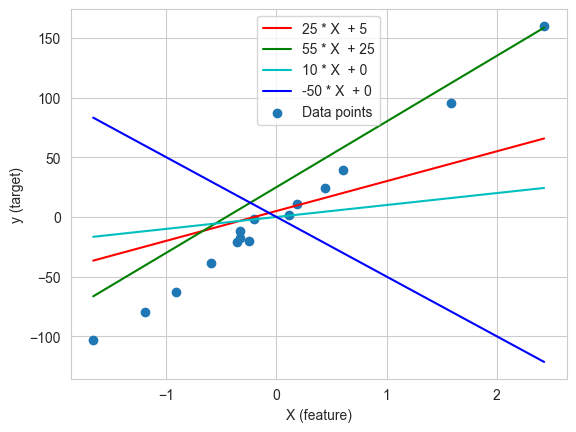

In [13]:
def plot_line(slope: float, intercept: float, color: None):
    y_value = slope * X_value + intercept
    plt.plot(X_value, y_value, label=f'{slope} * X  + {intercept}', color=color)

plot_line(slope = 25, intercept=5, color='r')
plot_line(slope = 55, intercept=25, color='g')
plot_line(slope = 10, intercept=0, color='c')
plot_line(slope = -50, intercept=0, color='b')

plt.scatter(X, y, label='Data points')
plt.xlabel('X (feature)')
plt.ylabel('y (target)')
plt.legend()
plt.show()

## Metrics

MSE = Mean square error
$$ MSE = \sum{(Y - \hat{Y}) ^ {2}} / n$$

In [14]:
def mse(y_true, y_pred):
    n = len(y_true)
    mse_value = np.sum((y_true - y_pred) * (y_true - y_pred)) / n
    return mse_value

In [15]:
y_pred = slope * X + intercept

In [16]:
y_pred

array([[ 19.82283303],
       [ -0.78847367],
       [-58.2506953 ],
       [  0.44171332],
       [  5.98543353],
       [  3.9079463 ],
       [ 23.25454194],
       [121.95393223],
       [ 84.62916915],
       [ 41.55275051],
       [-25.00622581],
       [  0.48572186],
       [-37.48164295],
       [ 34.41400942],
       [-11.03201295]])

In [17]:
y

array([   1.94203959,  -21.32380343, -103.34738888,  -11.68251426,
         -1.68867254,  -20.40253906,   10.67476569,  160.13207878,
         95.41675862,   39.57754535,  -63.01283162,  -17.48568183,
        -79.81340657,   24.24295569,  -38.25529593])

In [18]:
mse(y, y_pred)

92976.51475339654

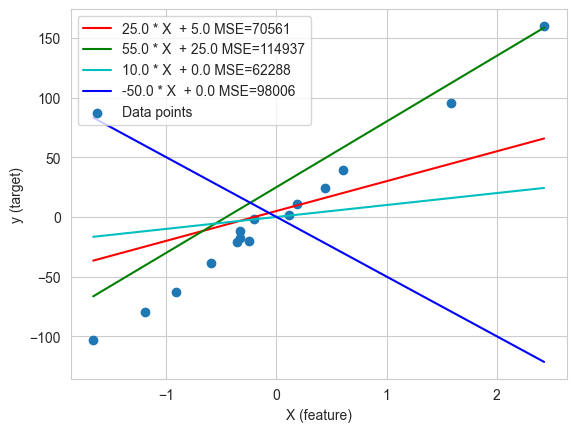

In [19]:
def plot_line(slope: float, intercept: float, color: None):
    y_value = slope * X_value + intercept
    y_pred = slope * X + intercept
    plt.plot(X_value, y_value, label=f'{slope:.1f} * X  + {intercept:.1f} MSE={mse(y, y_pred):.0f}', color=color)

plot_line(slope = 25, intercept=5, color='r')
plot_line(slope = 55, intercept=25, color='g')
plot_line(slope = 10, intercept=0, color='c')
plot_line(slope = -50, intercept=0, color='b')

plt.scatter(X, y, label='Data points')
plt.xlabel('X (feature)')
plt.ylabel('y (target)')
plt.legend()
plt.show()

## How to find best solution (find best slope and best intercept)

### Scalar formula
$$ slope = \frac{n \sum{xy} - \sum{x}\sum{y}}{n\sum{x^2} - (\sum{x})^2} $$
$$intercept = \frac{\sum{y} - slope\sum{x}}{n}$$

In [20]:
n = len(X)

In [21]:
X = X.ravel()
slope = (n * np.sum(X * y) - np.sum(X) * np.sum(y)) / (n * np.sum(X * X) - np.sum(X) * np.sum(X))
intercept = (np.sum(y) - slope * np.sum(X)) / n

In [22]:
print(slope, intercept)

63.81450048774618 0.3727943994170533


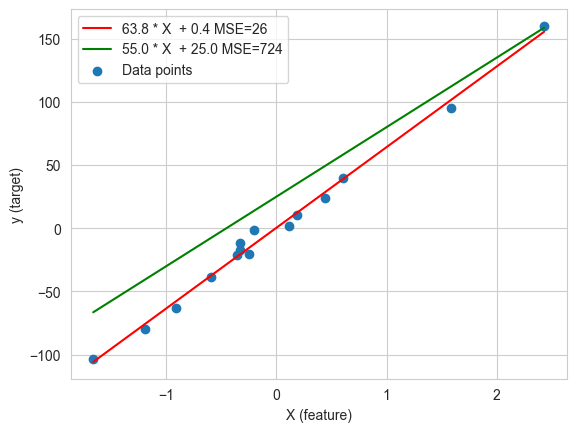

In [23]:
plot_line(slope = slope, intercept=intercept, color='r')
plot_line(slope = 55, intercept=25, color='g')
# plot_line(slope = 10, intercept=0, color='c')
# plot_line(slope = -50, intercept=0, color='b')

plt.scatter(X, y, label='Data points')
plt.xlabel('X (feature)')
plt.ylabel('y (target)')
plt.legend()
plt.show()

## Linear algebra approach

$$ w = (X^T X)^{-1}X^Ty$$
$$w = [intercept, slope]$$

In [24]:
X_mat = np.vstack((np.ones(len(X)), X)).T

w = np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T @ y

In [25]:
w

array([ 0.3727944 , 63.81450049])

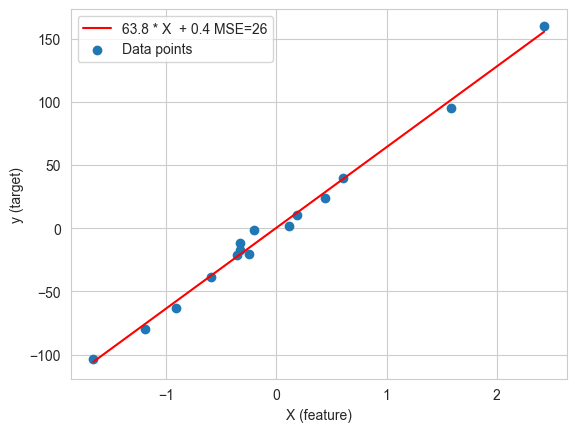

In [26]:
plot_line(slope = w[1], intercept=w[0], color='r')

plt.scatter(X, y, label='Data points')
plt.xlabel('X (feature)')
plt.ylabel('y (target)')
plt.legend()
plt.show()

# Real problem solving with regression

In [27]:
df = pd.read_csv('train.csv')

In [28]:
X = df.drop('SalePrice', axis=1)
y = df.SalePrice

In [29]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [31]:
numerical_columns = [col for col in X.columns if X[col].dtype != 'O']

In [32]:
X = X[numerical_columns]

In [33]:
X.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [34]:
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
X = X.fillna(0)

In [37]:
lr = LinearRegression() #instance of linear regresion
lr.fit(X, y)

LinearRegression()

In [38]:
lr.coef_

array([-1.05037981e+00, -1.67265378e+02,  8.82721636e+00,  3.91736144e-01,
        1.73094077e+04,  5.11258066e+03,  3.38099897e+02,  1.22085282e+02,
        2.80750884e+01,  9.54745392e+00,  7.79991152e-02, -5.59861713e-01,
        9.06559132e+00,  1.86686423e+01,  1.99106466e+01, -1.03922872e+01,
        2.81870016e+01,  8.54931526e+03,  1.70858322e+03,  3.23358159e+03,
       -1.91254217e+03, -1.02723819e+04, -1.57576438e+04,  5.00465246e+03,
        4.07490643e+03, -1.45660325e+01,  1.56871995e+04,  5.00076783e+00,
        2.57928935e+01, -6.28516623e+00,  1.16187106e+01,  2.02281447e+01,
        5.77093753e+01, -3.21514088e+01, -4.80748338e-01, -4.18818929e+01,
       -7.12877479e+02])

In [39]:
lr.intercept_

484276.6877921141

In [40]:
y_pred = lr.predict(X)

In [41]:
y_pred.shape

(1460,)

In [42]:
from sklearn.metrics import mean_squared_error as mse

In [43]:
mse(y, y_pred)

1157752536.4614732

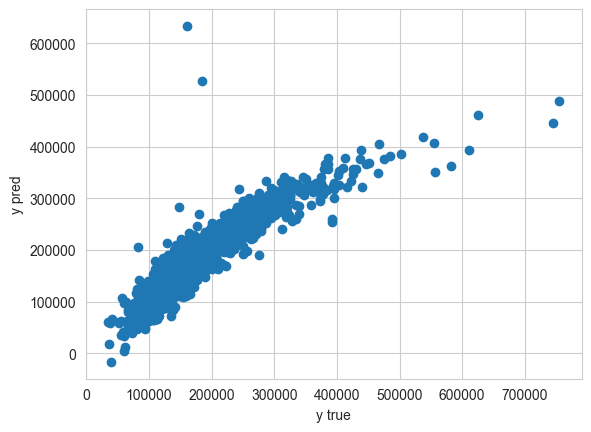

In [44]:
plt.scatter(y, y_pred)
plt.xlabel('y true')
plt.ylabel('y pred')
plt.show()

In [45]:
from sklearn.metrics import r2_score

In [46]:
print(np.corrcoef(y, y_pred)[0, 1])
print(r2_score(y, y_pred))

0.9035638135667602
0.8164275651873065
